In [1]:
import copy
import matplotlib.patches as patches
import Metrica_Viz as mviz
import Metrica_IO as mio
import numpy as np
import pandas as pd
from preprocessing import PreProcessing
from cmap import Colormap
from imblearn.over_sampling import SMOTE, RandomOverSampler
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans, KMeans, SpectralClustering
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [2]:
game_1_pre = PreProcessing(data_home="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv", 
                           data_away="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv")
game_1_data = game_1_pre.load_and_process_data(add_ball=False)

In [3]:
game_2_pre = PreProcessing(data_home="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Home_Team.csv", 
                           data_away="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv")
game_2_data = game_2_pre.load_and_process_data(add_ball=False)

In [4]:
game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_20-x,Away-P_20-y,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55974,0.67776,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55992,0.67791,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71264,1,71264,2850.56,0.15301,0.67549,NaN,NaN,0.37376,0.75443,0.45015,...,0.48728,0.99325,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311
71265,1,71265,2850.60,0.15325,0.67549,NaN,NaN,0.37376,0.75443,0.45040,...,0.48740,0.99372,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311
71266,1,71266,2850.64,0.15340,0.67549,NaN,NaN,0.37376,0.75443,0.45055,...,0.48750,0.99406,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311
71267,1,71267,2850.68,0.15355,0.67549,NaN,NaN,0.37376,0.75443,0.45063,...,0.48760,0.99444,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311


In [5]:
game_2_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_20-x,Away-P_20-y,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y
1,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
2,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
3,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
4,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
5,1,5,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67937,1,67937,2717.48,0.81546,0.72958,0.51337,0.71683,0.52318,0.78966,0.54702,...,0.40207,0.81187,0.43050,0.63162,0.33736,0.43011,0.52637,0.93788,0.46338,0.61444
67938,1,67938,2717.52,0.81461,0.73064,0.51339,0.71801,0.52312,0.79035,0.54692,...,0.40221,0.81283,0.43062,0.63247,0.33727,0.43065,0.52626,0.93879,0.46345,0.61528
67939,1,67939,2717.56,0.81413,0.73124,0.51340,0.71929,0.52312,0.79124,0.54677,...,0.40239,0.81370,0.43075,0.63337,0.33729,0.43166,0.52624,0.93940,0.46360,0.61612
67940,1,67940,2717.60,0.81385,0.73124,0.51342,0.72035,0.52315,0.79171,0.54673,...,0.40261,0.81427,0.43091,0.63441,0.33734,0.43225,0.52621,0.94018,0.46374,0.61695


## Tracking for individual Players for the First Period

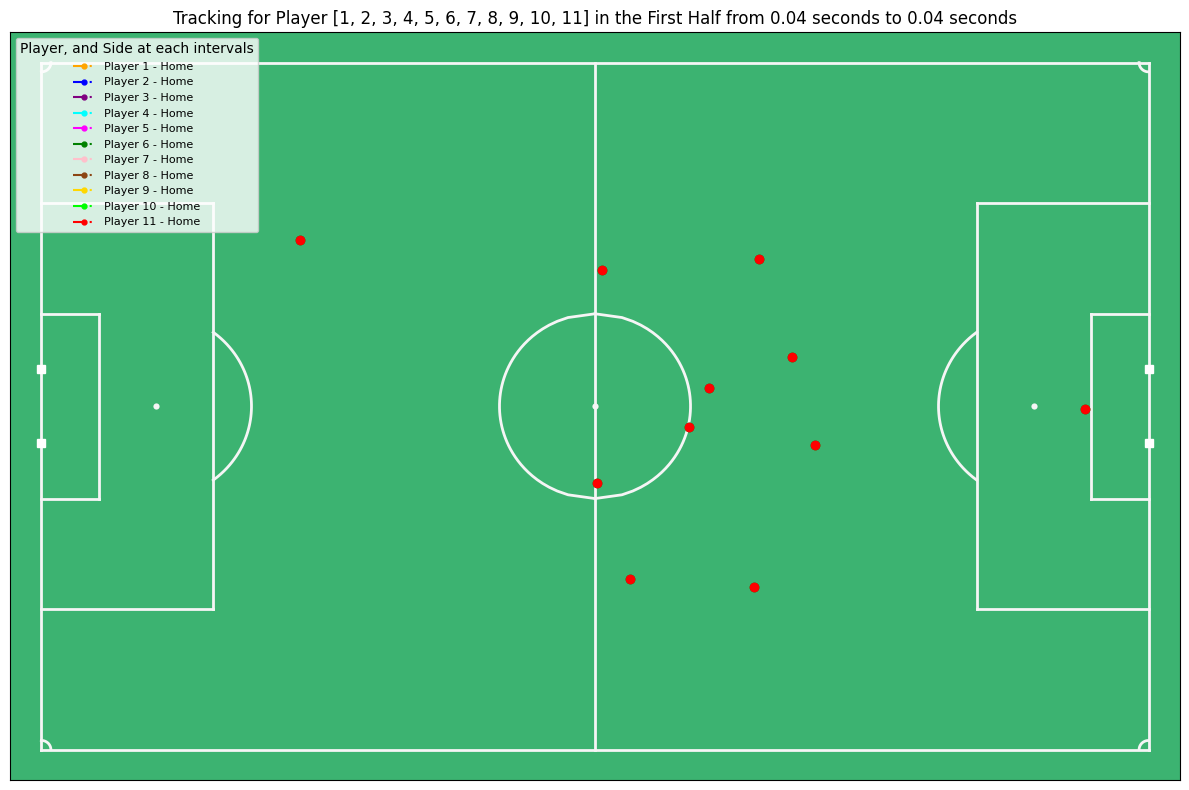

In [6]:
game_2_pre.player_tracking(game_2_data.iloc[:1], players=[1,2,3,4,5,6,7,8,9,10,11], sides=["Home"]*11, plot_ball=False)

In [7]:
# player_tracking(period_1_data)
# player_tracking(period_1_data_home, [2])
# player_tracking(period_1_data_home, [5])
# player_tracking(period_1_data_home, [8])

# Grouping players time interval on 1 second interval

In [8]:
game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_20-x,Away-P_20-y,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55974,0.67776,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55992,0.67791,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71264,1,71264,2850.56,0.15301,0.67549,NaN,NaN,0.37376,0.75443,0.45015,...,0.48728,0.99325,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311
71265,1,71265,2850.60,0.15325,0.67549,NaN,NaN,0.37376,0.75443,0.45040,...,0.48740,0.99372,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311
71266,1,71266,2850.64,0.15340,0.67549,NaN,NaN,0.37376,0.75443,0.45055,...,0.48750,0.99406,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311
71267,1,71267,2850.68,0.15355,0.67549,NaN,NaN,0.37376,0.75443,0.45063,...,0.48760,0.99444,0.49943,1.04095,0.50489,1.05000,0.44102,0.87424,0.51488,1.00311


In [9]:
def vel_acc(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the velocity and acceleration of players and ball in a given dataset.
    
    Parameters:
    dataset (pandas.DataFrame): The input dataset containing player and ball positions over time.
    
    Returns:
    pandas.DataFrame: The original dataset with additional columns for velocity and acceleration.
    """
    temp_data = copy.deepcopy(dataset)
    star_idx = temp_data.columns.get_loc("Time[s]")
    player_columns = temp_data.columns[star_idx + 1:]

    for i in range(0, player_columns.shape[0] - 1, 2):
        # Calculate Euclidean distance between consecutive points
        ply_x, ply_y = player_columns[i], player_columns[i + 1]

        x_diff = temp_data[ply_x].diff()
        y_diff = temp_data[ply_y].diff()
        
        # Calculate time difference between frames
        time_diff = temp_data['Time[s]'].diff()
        
        # Calculate velocity (distance travelled / time)
        vx = x_diff / time_diff
        vy = y_diff / time_diff
        velocity = np.sqrt(vx**2 + vy**2)
        
        # Calculate acceleration (change in velocity / time)
        ax = vx.diff() / time_diff
        ay = vy.diff() / time_diff
        acceleration = np.sqrt(ax**2 + ay**2)
        
        if "ball" in ply_x:
            temp_data[f"ball_velocity"] = velocity
            temp_data[f"ball_acceleration"] = acceleration
        else:
            players_num = ply_x[7]
            if len(ply_x) == 11:
                players_num = ply_x[7:9]
                
            temp_data[f"P_{players_num}_velocity"] = velocity
            temp_data[f"P_{players_num}_acceleration"] = acceleration
    
    return temp_data

In [10]:
def get_frames(dataset: pd.DataFrame, players: list[int], frame: int, frame_interval: int = 5000) -> pd.DataFrame:
    start_range = dataset.index[0] if frame - frame_interval < dataset.index[0] else frame - frame_interval
    end_range = dataset.index[-1] if frame + frame_interval + 1 > dataset.index[-1] else frame + frame_interval + 1
    
    index = pd.RangeIndex(start=start_range, stop=end_range, step=1)
    temp_data = pd.DataFrame(index=index)
    # temp_data["Time[s]"] = dataset["Time[s]"]

    for i in players:
        if int(i[2:]) < 15:
            # The index is the same as frames
            temp_data[f"Home-{i}-x"] = dataset.loc[start_range:end_range, f"Home-{i}-x"]
            temp_data[f"Home-{i}-y"] = dataset.loc[start_range:end_range, f"Home-{i}-y"]
        else:
            # The index is the same as frames
            temp_data[f"Away-{i}-x"] = dataset.loc[start_range:end_range, f"Away-{i}-x"]
            temp_data[f"Away-{i}-y"] = dataset.loc[start_range:end_range, f"Away-{i}-y"]
        
        temp_data[f"{i}_velocity"] = dataset.loc[start_range:end_range, f"{i}_velocity"]
        temp_data[f"{i}_acceleration"] = dataset.loc[start_range:end_range, f"{i}_acceleration"]
        
    return temp_data

# Tracking players closest to the ball using frames

In [11]:
vel_acc_game_1_data = vel_acc(game_1_data)
vel_acc_game_2_data = vel_acc(game_2_data)

In [12]:
vel_acc_game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.003509,0.087723,0.011138,0.278458,0.019121,0.478033,0.015201,0.380019,0.029611,0.740275
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.005858,0.091001,0.008515,0.333366,0.011560,0.190804,0.022103,0.613456,0.029100,0.160078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71264,1,71264,2850.56,0.15301,0.67549,NaN,NaN,0.37376,0.75443,0.45015,...,0.016134,0.062812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71265,1,71265,2850.60,0.15325,0.67549,NaN,NaN,0.37376,0.75443,0.45040,...,0.012127,0.100778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71266,1,71266,2850.64,0.15340,0.67549,NaN,NaN,0.37376,0.75443,0.45055,...,0.008860,0.082206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71267,1,71267,2850.68,0.15355,0.67549,NaN,NaN,0.37376,0.75443,0.45063,...,0.009823,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
vel_acc_game_2_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
3,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1,5,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67937,1,67937,2717.48,0.81546,0.72958,0.51337,0.71683,0.52318,0.78966,0.54702,...,0.025527,0.118750,0.025031,0.039528,0.008962,0.187916,0.018916,0.006250,0.021397,0.013975
67938,1,67938,2717.52,0.81461,0.73064,0.51339,0.71801,0.52312,0.79035,0.54692,...,0.024254,0.031869,0.021461,0.103456,0.013686,0.134919,0.022916,0.100195,0.021073,0.019764
67939,1,67939,2717.56,0.81413,0.73124,0.51340,0.71929,0.52312,0.79124,0.54677,...,0.022211,0.061555,0.022734,0.031869,0.025255,0.301688,0.015258,0.195756,0.021332,0.050000
67940,1,67940,2717.60,0.81385,0.73124,0.51342,0.72035,0.52315,0.79171,0.54673,...,0.015275,0.189159,0.026306,0.089486,0.014803,0.263169,0.019514,0.106434,0.021043,0.008839


In [14]:
game_1_ply_tra = vel_acc_game_1_data.loc[:70578, "Home-P_1-x":]
game_2_ply_tra = vel_acc_game_2_data.loc[:67852, "Home-P_1-x":]

In [15]:
game_1_players, game_1_vel_acc = game_1_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_1_ply_tra.loc[:,"P_1_velocity":]
game_2_players, game_2_vel_acc = game_2_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_2_ply_tra.loc[:,"P_1_velocity":]

In [16]:
game_1_player_data = get_frames(game_1_ply_tra, players=game_1_pre.player_names, frame=5000).fillna(0)
game_2_player_data = get_frames(game_2_ply_tra, players=game_2_pre.player_names, frame=5000).fillna(0)

# Classification

In [17]:
def change_player_name(data: pd.Series) -> pd.Series:
    result = []
    name = ""
    for i in range(len(data)):
        item = data.iloc[i]
        if len(item) == 8:
            if int(item[-2:]) < 12:
                name = f"Home-P_{item[-2:]}"
            else:
                name = f"Away-P_{item[-2:]}"
        else:
            name = f"Home-P_{item[-1:]}"
            
        result.append(name)

    return pd.Series(data=result, name=data.name)

In [18]:
game_1_event_data = pd.read_csv("data/Sample_Game_1/Sample_Game_1_RawEventsData.csv")
game_2_event_data = pd.read_csv("data/Sample_Game_2/Sample_Game_2_RawEventsData.csv")

game_1_event_data = game_1_event_data[game_1_event_data["Period"] == 1]
game_2_event_data = game_2_event_data[game_2_event_data["Period"] == 1]

In [19]:
game_1_event_data = game_1_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_1_event_data["Current Player"] = change_player_name(game_1_event_data["To"].combine_first(game_1_event_data["From"]))

game_2_event_data = game_2_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_2_event_data["Current Player"] = change_player_name(game_2_event_data["To"].combine_first(game_2_event_data["From"]))

In [20]:
start_frames = np.array(game_1_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_1_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_1_event = pd.DataFrame()
end = game_1_player_data.index[-1] + 1
for i, f in enumerate(frame_ranges):
    e = f[1] if end > f[1] else end
    for j in range(f[0], e):
        game_1_event.loc[j, "Type"] =  game_1_event_data.loc[i + 1, "Type"]
        # game_1_event.loc[j, "From"] =  game_1_event_data.loc[i + 1, "From"]
        # game_1_event.loc[j, "To"] =  game_1_event_data.loc[i + 1, "To"]

C:\Users\noill\AppData\Local\Temp\ipykernel_98604\1050725259.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PASS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  game_1_event.loc[j, "Type"] =  game_1_event_data.loc[i + 1, "Type"]


In [21]:
start_frames = np.array(game_2_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_2_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_2_event = pd.DataFrame()
end = game_2_player_data.index[-1] + 1
for i, f in enumerate(frame_ranges):
    e = f[1] if end > f[1] else end
    for j in range(f[0], e):
        game_2_event.loc[j, "Type"] =  game_2_event_data.loc[i + 1, "Type"]
        # game_2_event.loc[j, "From"] =  game_2_event_data.loc[i + 1, "From"]
        # game_2_event.loc[j, "To"] =  game_2_event_data.loc[i + 1, "To"]

C:\Users\noill\AppData\Local\Temp\ipykernel_98604\875363465.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PASS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  game_2_event.loc[j, "Type"] =  game_2_event_data.loc[i + 1, "Type"]


In [22]:
game_1_event

,Type
1,PASS
2,PASS
3,PASS
4,PASS
5,PASS
...,...
9658,BALL OUT
9659,BALL OUT
9660,BALL OUT
9661,BALL OUT


In [23]:
game_2_event

,Type
51,PASS
52,PASS
53,PASS
54,PASS
55,PASS
...,...
9945,BALL OUT
9946,BALL OUT
9947,BALL OUT
9948,BALL OUT


In [24]:
X_1 = game_1_player_data.loc[game_1_event.index]
y_1 = np.array([game_1_event["Type"]]).T

In [25]:
X_2 = game_2_player_data.loc[game_2_event.index]
y_2 = np.array([game_2_event["Type"]]).T

In [26]:
X = pd.concat([X_1, X_2])
y = np.concatenate((y_1, y_2), axis=0)

assert X.shape[0] == y.shape[0]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
np.unique(y, return_counts=True)

(array(['BALL LOST', 'BALL OUT', 'PASS', 'SHOT'], dtype=object),
 array([1905,  573, 5048,  114], dtype=int64))

In [30]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
np.unique(y_train_resampled, return_counts=True)

(array(['BALL LOST', 'BALL OUT', 'PASS', 'SHOT'], dtype=object),
 array([4053, 4053, 4053, 4053], dtype=int64))

In [32]:
lg = LogisticRegression(random_state=0)
lg.fit(X_train_resampled, y_train_resampled)
lg_y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, lg_y_pred)
print("Logistic regression accuracy:", accuracy)

Logistic regression accuracy: 0.8488219895287958


C:\Users\noill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_resampled, y_train_resampled)
rfc_y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, rfc_y_pred)
print("Random forest classifier accuracy:", accuracy)

Random forest classifier accuracy: 0.9947643979057592


In [34]:
adc = AdaBoostClassifier(random_state=0)
adc.fit(X_train_resampled, y_train_resampled)
adc_y_pred = adc.predict(X_test)

accuracy = accuracy_score(y_test, adc_y_pred)
print("AdaBoost classifier accuracy:", accuracy)

AdaBoost classifier accuracy: 0.27290575916230364
